In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
from collections import Counter

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm

import matplotlib.pyplot as plt
import seaborn as sns


# HW 4

# Q1

For this question we are going to use [1994 Census Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult).

Construct 

- Logistic regression
- SVM
- KNN
- Decision tree
- Gradient Boost (XGBoost)
- Neural network

models for the data. Cross-validate your models and measure the accuracies. Compare them putting the accuracies in a table.

### Meta data dosyasına bakarak, continuous ve discrete değişkenleri gözlemleyip. İşlemleri ona göre yapabiliriz.

<strong>age: continuous. </strong>

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

<strong>fnlwgt: continuous.</strong>

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

<strong>education-num: continuous.</strong>

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

<strong>capital-gain: continuous.</strong>

<strong>capital-loss: continuous.</strong>

<strong>hours-per-week: continuous.</strong>

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
names = ["age", "workclass", "fnlwgt", "education", "educationnum", "maritalstatus", "occupation", "relationship","race", 
         "sex", "capitalgain", "capitalloss" , "hoursperweek", "nativecountry", "income"]
len(names)

15

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.columns = names
data

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
X = data.iloc[:,0:14]

In [6]:
def helper(x):
    if ('<=' in x):
        return 0
    else:
        return 1
    
h = [helper(x) for x in data.iloc[:,14]]

In [7]:
data["income"] = h
data

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [8]:
modeldataols = ols("income ~  age + workclass + fnlwgt + education + educationnum + maritalstatus + occupation + relationship + race + sex + capitalgain + capitalloss + hoursperweek + nativecountry", data=data).fit()
modeldataols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:52:28   Log-Likelihood:                -11038.
No. Observations:               32561   AIC:                         2.227e+04
Df Residuals:                   32462   BIC:                         2.311e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.3983      0.038    -10.434      0.000      -0.473      -0.323
workclass[T. Federal-gov]                        0.1072      0.014      7.893      0.000       0.081       0.134
workclass[T. Local-gov]                          0.0061      0.012      0.523      0.601      -0.017       0.029
workclass[T. Never-worked]                       0.0430      0.129      0.333      0.739      -0.210       0.296
workclass[T. Private]                            0.0356      0.009      3.810      0.000       0.017       0.054
workclass[T. Self-emp-inc]                       0.0953      0.014      7.008      0.000       0.069       0.122
workclass[T. Self-emp-not-inc]                  -0.0290      0.011     -2.569      0.010      -0.051      -0.007
workclass[T. State-gov]                         -0.0088      0.013     -0.685      0.493      -0.034       0.016
workclass[T. Without-pay]                       -0.1225      0.087     -1.406      0.160      -0.293       0.048
education[T. 11th]                           -5.519e-05      0.014     -0.004      0.997      -0.028       0.028
education[T. 12th]                              -0.0019      0.019     -0.100      0.920      -0.039       0.035
education[T. 1st-4th]                            0.0464      0.030      1.536      0.125      -0.013       0.106
education[T. 5th-6th]                            0.0325      0.024      1.360      0.174      -0.014       0.079
education[T. 7th-8th]                           -0.0244      0.019     -1.307      0.191      -0.061       0.012
education[T. 9th]                               -0.0108      0.019     -0.559      0.576      -0.048       0.027
education[T. Assoc-acdm]                        -0.0452      0.013     -3.527      0.000      -0.070      -0.020
education[T. Assoc-voc]                         -0.0196      0.012     -1.612      0.107      -0.044       0.004
education[T. Bachelors]                          0.0256      0.009      2.720      0.007       0.007       0.044
education[T. Doctorate]                          0.1555      0.016      9.603      0.000       0.124       0.187
education[T. HS-grad]                           -0.0380      0.010     -3.890      0.000      -0.057      -0.019
education[T. Masters]                            0.0892      0.011      7.942      0.000       0.067       0.111
education[T. Preschool]                          0.0802      0.048      1.662      0.097      -0.014       0.175
education[T. Prof-school]                        0.1263      0.015      8.413      0.000       0.097       0.156
education[T. Some-college]                      -0.0148      0.010     -1.535      0.125      -0.034       0.004
maritalstatus[T. Married-AF-spou

<BarContainer object of 73 artists>

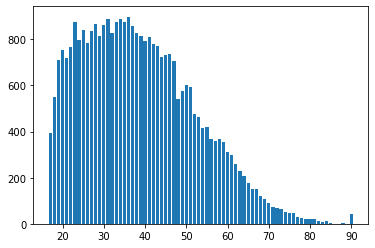

In [9]:
ages = Counter(data.iloc[:,0])
plt.bar(ages.keys(), ages.values())

Neredeyse her yaştan insan bulunuyor ve bunların dağılımı oldukça düzgün, bu sebepten yaşları kategorize ederken 4 farklı kategori kurmak mümkün. Bunlar <25, 25-40, 40-55, >55 şeklinde neredeyse eşit sayıda ve anlamlı olacak biçimde seçilebilir. Ancak bizden böyle bir şey istenmediği için aynı şekilde devam ediyorum.

[Text(0.5, 1.0, 'Countplot of income greater than 50K')]

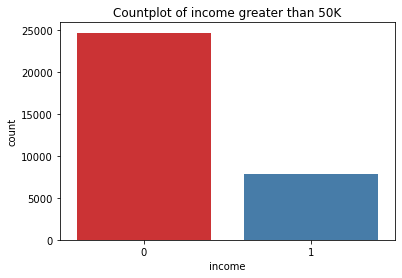

In [10]:
sns.countplot(x = "income", data = data, palette = "Set1").set(title = "Countplot of income greater than 50K")

Yukarıdaki grafikten de görüleceği üzere, 50k altında geliri olanlar bu miktarın üzerine kazananlara nazaran 3 kat daha fazla.

#### Şimdi geldik elimizdeki kategorik değişkenleri, binary olarak sınıflandırmaya. Aksi halde Logistic Regression, SVM, KNN metodları bu data üzerinde uygulanamaz durumda.

In [11]:
trivial = np.zeros((32561,1)).astype(int)
df1 = pd.DataFrame(trivial, columns = ["Deneme"])

discrete_values = ["workclass", "education", "maritalstatus" , "occupation" , "relationship", "race", "sex", "nativecountry"]

for a in range(len(discrete_values)):
    arr_unique = np.unique(data[discrete_values[a]])
    arr = data[discrete_values[a]]
    clmns = []
    
    for u in arr_unique:
        string = str(discrete_values[a]) + str(u)
        clmns.append(string)

    matrix = np.zeros((32561,len(arr_unique)))
    for i in range(len(arr_unique)):
        for j in range(32561):
            if arr[j] == arr_unique[i]:
                matrix[j][i] = 1;
    matrix = matrix.astype(int)
    df2 = pd.DataFrame(matrix, columns = clmns)
    df1 = df1.join(df2)
df1 = df1.drop(["Deneme"], axis=1)

#### Yukarıda yaptığım işlemi satır satır açıklamak oldukça zor. Ancak şöyle anlatabilirim. Kategorik değişken olan bütün sutünların isimlerini bir liste haline getirip, onlarla ilgili bütün sutünlardaki unique değerleri seçip, o uzunlukta yeni "alt matrisler" oluşturdum. Daha sonra bunları ilk label isimlerine ve ilgili değer isimlerini de koruyarak esas datasetimin içerisine yerleştirdim.

#### Örnek: "Cinsiyet" ile isimlendirilmiş sutün iki alt değer içersin: "Kadın" ve "Erkek". Bu durumda bu algoritma $M_(nx2)$ boyutlu bir matris oluşturup, bunların isimlerini "Cinsiyet Erkek" ve "Cinsiyet Kadın" olarak atayacak. Ardından "Cinsiyet" sütunu altındaki $i.$ eleman kadın ise "Cinsiyet Kadın" sütununun i. elemanı 1 olarak, "Cinsiyet Erkek" sütununun i. elemanı 0 olarak atanacak. Ardından bunu ana dataframe'e kaydediyor. Eğer üst sutün altında m farklı değer içeriyor olsaydı, $M_(nxm)$ boyutlu bir alt matris oluşturup aynı işlemi yapacaktı. 

In [12]:
u = data.drop(columns= ["fnlwgt" , "workclass", "education", "maritalstatus" , "occupation" , "relationship", "race", "sex", "nativecountry"])

In [13]:
df = df1.join(u)

Bunu droplama sebebim, datayı hazırlayan kişinin kendince kişilere verdiği ağırlıklar. Aynı bölgede yaşayan, benzer yaşam standartlarında olan insanlara aynı değerleri veriyor. Ancak lokal regionlar için bu optimize ancak geniş kapsamlı olarak değil. Yani Almanya'daki aynı standartlarda bir kişi ile Amerikadaki aynı ağırlık puanına sahip değil. 

In [14]:
df

,workclass ?,workclass Federal-gov,workclass Local-gov,workclass Never-worked,workclass Private,workclass Self-emp-inc,workclass Self-emp-not-inc,workclass State-gov,workclass Without-pay,education 10th,...,nativecountry Trinadad&Tobago,nativecountry United-States,nativecountry Vietnam,nativecountry Yugoslavia,age,educationnum,capitalgain,capitalloss,hoursperweek,income
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,39,13,2174,0,40,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,50,13,0,0,13,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,38,9,0,0,40,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,53,7,0,0,40,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,28,13,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,27,12,0,0,38,0
32557,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,40,9,0,0,40,1
32558,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,58,9,0,0,40,0
32559,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,22,9,0,0,20,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 108 entries, workclass ? to income
dtypes: int32(102), int64(6)
memory usage: 14.2 MB


Görüldüğü üzere dataset tamamen integer değerlere dönmüş durumda. Bu sayede artık data üzerinde işlemler gerçekleştirebiliriz. 

In [310]:
df.to_csv("Q1prepared.txt", sep=",")

#### Yukarıdaki satırda gerçekleşen işlemi, UHEM üzerinden işlem yapabilmek adına yazdım. Bu sayede datayı UHEM'e verebileceğim.

In [16]:
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression

In [80]:
Q1prepared = np.loadtxt('Q1prepared.txt', delimiter=",")

Q1 = Q1prepared.astype(int)
x = Q1[:,1:107]
y = Q1[:,107]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

#Bu kod bloğu, UHEM'de derlenmek üzere yazılmıştı.
#Ancak modellerin localde oldukça hızlı çalışması sebebiyle UHEM'e ihtiyaç duyulmadı. 


In [39]:
x = df.iloc[:,0:107]
y = df.iloc[:,107]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

## Logistic Regression

In [312]:
modelLR = LogisticRegression(C = 1, 
                            tol = 1e-1,
                            class_weight = "balanced",
                            penalty = "l2",
                            solver = "newton-cg",
                            multi_class = "multinomial",
                            max_iter = 100000)

modelLR.fit(x_train, y_train)
predictedLR = modelLR.predict(x_test)

In [314]:
print(accuracy_score(predictedLR, y_test))

0.8063261336881974


In [315]:
print(confusion_matrix(predictedLR, y_test))
chisquare(confusion_matrix(predictedLR, y_test),axis=None)

[[5900  390]
 [1502 1977]]


Power_divergenceResult(statistic=7070.649094073089, pvalue=0.0)

In [316]:
importance = modelLR.coef_.flatten()

### Lojistik regresyon, bu probleme uygun olduğu tahmin edilen parametreler girilerek denendiğinde, fena olmayan bir skor değeri ile tahminde bulundu, hem de lokalde olmasına rağmen oldukça hızlı bir şekilde çalışarak. 

<AxesSubplot:>

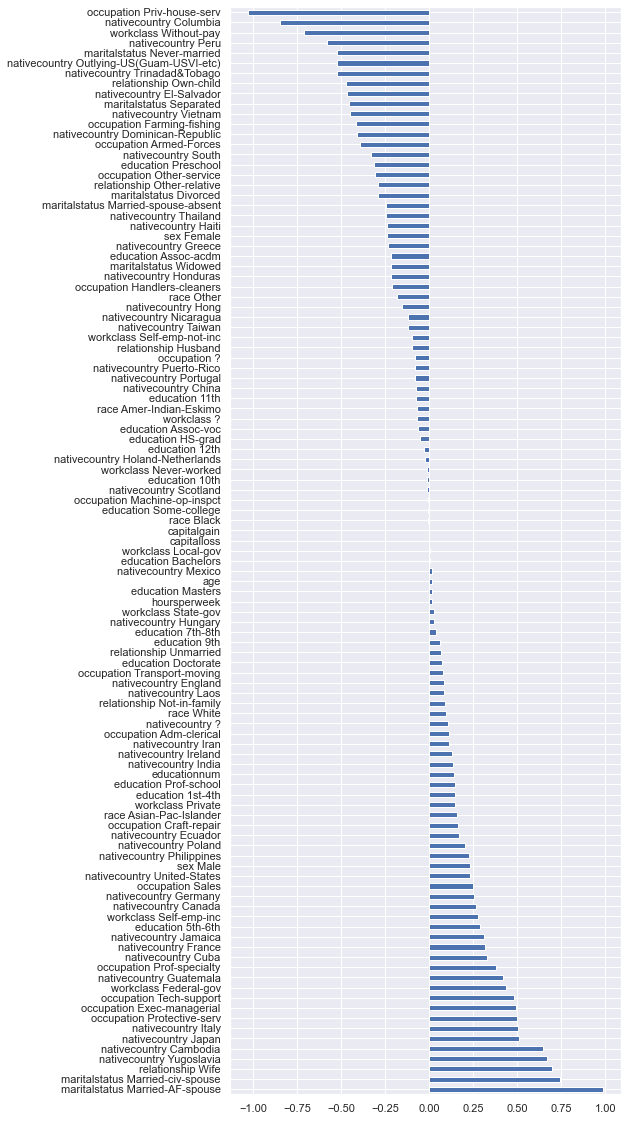

In [317]:
feat_importances = pd.Series(importance, index=x.columns)
feat_importances.nlargest(108).plot(kind='barh')

Burada ise Lojistik regresyon için grafiğin sağında kalanlar >50k iken, solunda kalanlar <50k için etken parametreler olarak gözüküyor. Ancak bunun için data üzerindeki değişkenlerin aşağı yukarı eşit bir şekilde dağılmış olması da olduça önemli. Bununla beraber bunun yorumu oldukça uzun olduğu için es geçiyorum.

### <font color='red'>Şimdi başka bir şey göstermek istiyorum. Sürekli datalar yok iken, algoritma oldukça yüksek bir tahmin değerinde bulunuyor. Aslında sürekli dataları dahil etmeden model kurmak daha avantajlı gibi gözüküyor. </font>

In [27]:
x1 = df1.iloc[:,0:101]
y1 = df1.iloc[:,101]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.30)

In [25]:
modelLR1 = LogisticRegression(C = 1, 
                            tol = 1e-1,
                            class_weight = "balanced",
                            penalty = "l2",
                            solver = "newton-cg",
                            multi_class = "multinomial",
                            max_iter = 100000)

modelLR1.fit(x1_train, y1_train)
predictedLR1 = modelLR1.predict(x1_test)

In [27]:
print(accuracy_score(predictedLR1, y1_test))

0.9951888627290408


In [28]:
print(confusion_matrix(predictedLR1, y1_test))
chisquare(confusion_matrix(predictedLR1, y1_test),axis=None)

[[9718    3]
 [  44    4]]


Power_divergenceResult(statistic=28900.867949636602, pvalue=0.0)

### <font color='red'>Aynı durum KNN ve SVM için de geçerli ancak çok uzatmamak adına onlarda bütün data ile işlemlere devam edeceğim. </font>

## SVM

In [81]:
from sklearn.svm import SVC

In [318]:
modelSVC = SVC(C=5,
             kernel='rbf',
             max_iter=50000)

modelSVC.fit(x_train, y_train)
predictedSVC = modelSVC.predict(x_test)

In [319]:
print(accuracy_score(predictedSVC, y_test))
print(confusion_matrix(predictedSVC, y_test))

0.8038693827413246
[[7190 1704]
 [ 212  663]]


In [320]:
chisquare(confusion_matrix(predictedSVC, y_test),axis=None)

Power_divergenceResult(statistic=12785.705292250997, pvalue=0.0)

### SVM algoritması, RBF ile en yüksek skoru verdi. Ancak yine de elle tutulur bir sonuç değil. 

## KNN

#### İlk olarak KNN algoritmasının hangi K değeri için en iyi sonucu verdiğini bulmaya çalışalım.

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [321]:
arr = np.arange(3,15,2)
cnf = np.array([])
score = np.array([])
for n in arr:
    modelKNN = KNeighborsClassifier(n_neighbors=n)
    modelKNN.fit(x_train,y_train)
    predictedKNN = modelKNN.predict(x_test)

    cm = confusion_matrix(y_test,predictedKNN)
    ms = modelKNN.score(x_test, y_test)
    cs = chisquare(cm,axis=None)
    score =  np.append(score, ms)
    cnf =  np.append(cnf, cs[0])

In [322]:
print(cnf)
print(score)

[ 9828.28160508 10046.03408742 10252.79670386 10356.10717576
 10438.62780223 10563.69280377]
[0.83816153 0.84092538 0.84420104 0.84420104 0.84430341 0.84542942]


In [324]:
print(confusion_matrix(y_test,predictedKNN))

[[6809  593]
 [ 917 1450]]


### Görüldüğü üzere KNN algoritması, 3'ten büyük bütün tek sayı değerleri için oldukça yüksek ve aynı skoru veriyor. 

In [95]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

In [188]:
classifier = DecisionTreeClassifier(max_depth=30 , criterion='gini')
classifier.fit(x,y)

DecisionTreeClassifier(max_depth=30)

In [189]:
classifier.score(x,y)

0.9639753078836645

In [187]:
print(classifier.tree_.max_depth)

30


In [197]:
np.unique(y)

array([0, 1], dtype=int64)

[Text(0.4732142857142857, 0.9, 'maritalstatus Married-civ-spouse <= 0.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]\nclass = 0'),
 Text(0.23214285714285715, 0.7, 'capitalgain <= 7073.5\ngini = 0.122\nsamples = 17585\nvalue = [16436, 1149]\nclass = 0'),
 Text(0.14285714285714285, 0.5, 'educationnum <= 12.5\ngini = 0.093\nsamples = 17274\nvalue = [16425, 849]\nclass = 0'),
 Text(0.07142857142857142, 0.3, 'capitalloss <= 2218.5\ngini = 0.048\nsamples = 13864\nvalue = [13522, 342]\nclass = 0'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'hoursperweek <= 43.5\ngini = 0.253\nsamples = 3410\nvalue = [2903, 507]\nclass = 0'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.32142857142857145, 0.5, 'age <= 20.5\ngini = 0.068\nsamples = 311\nvalue = [11, 300]\nclass = 1'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'

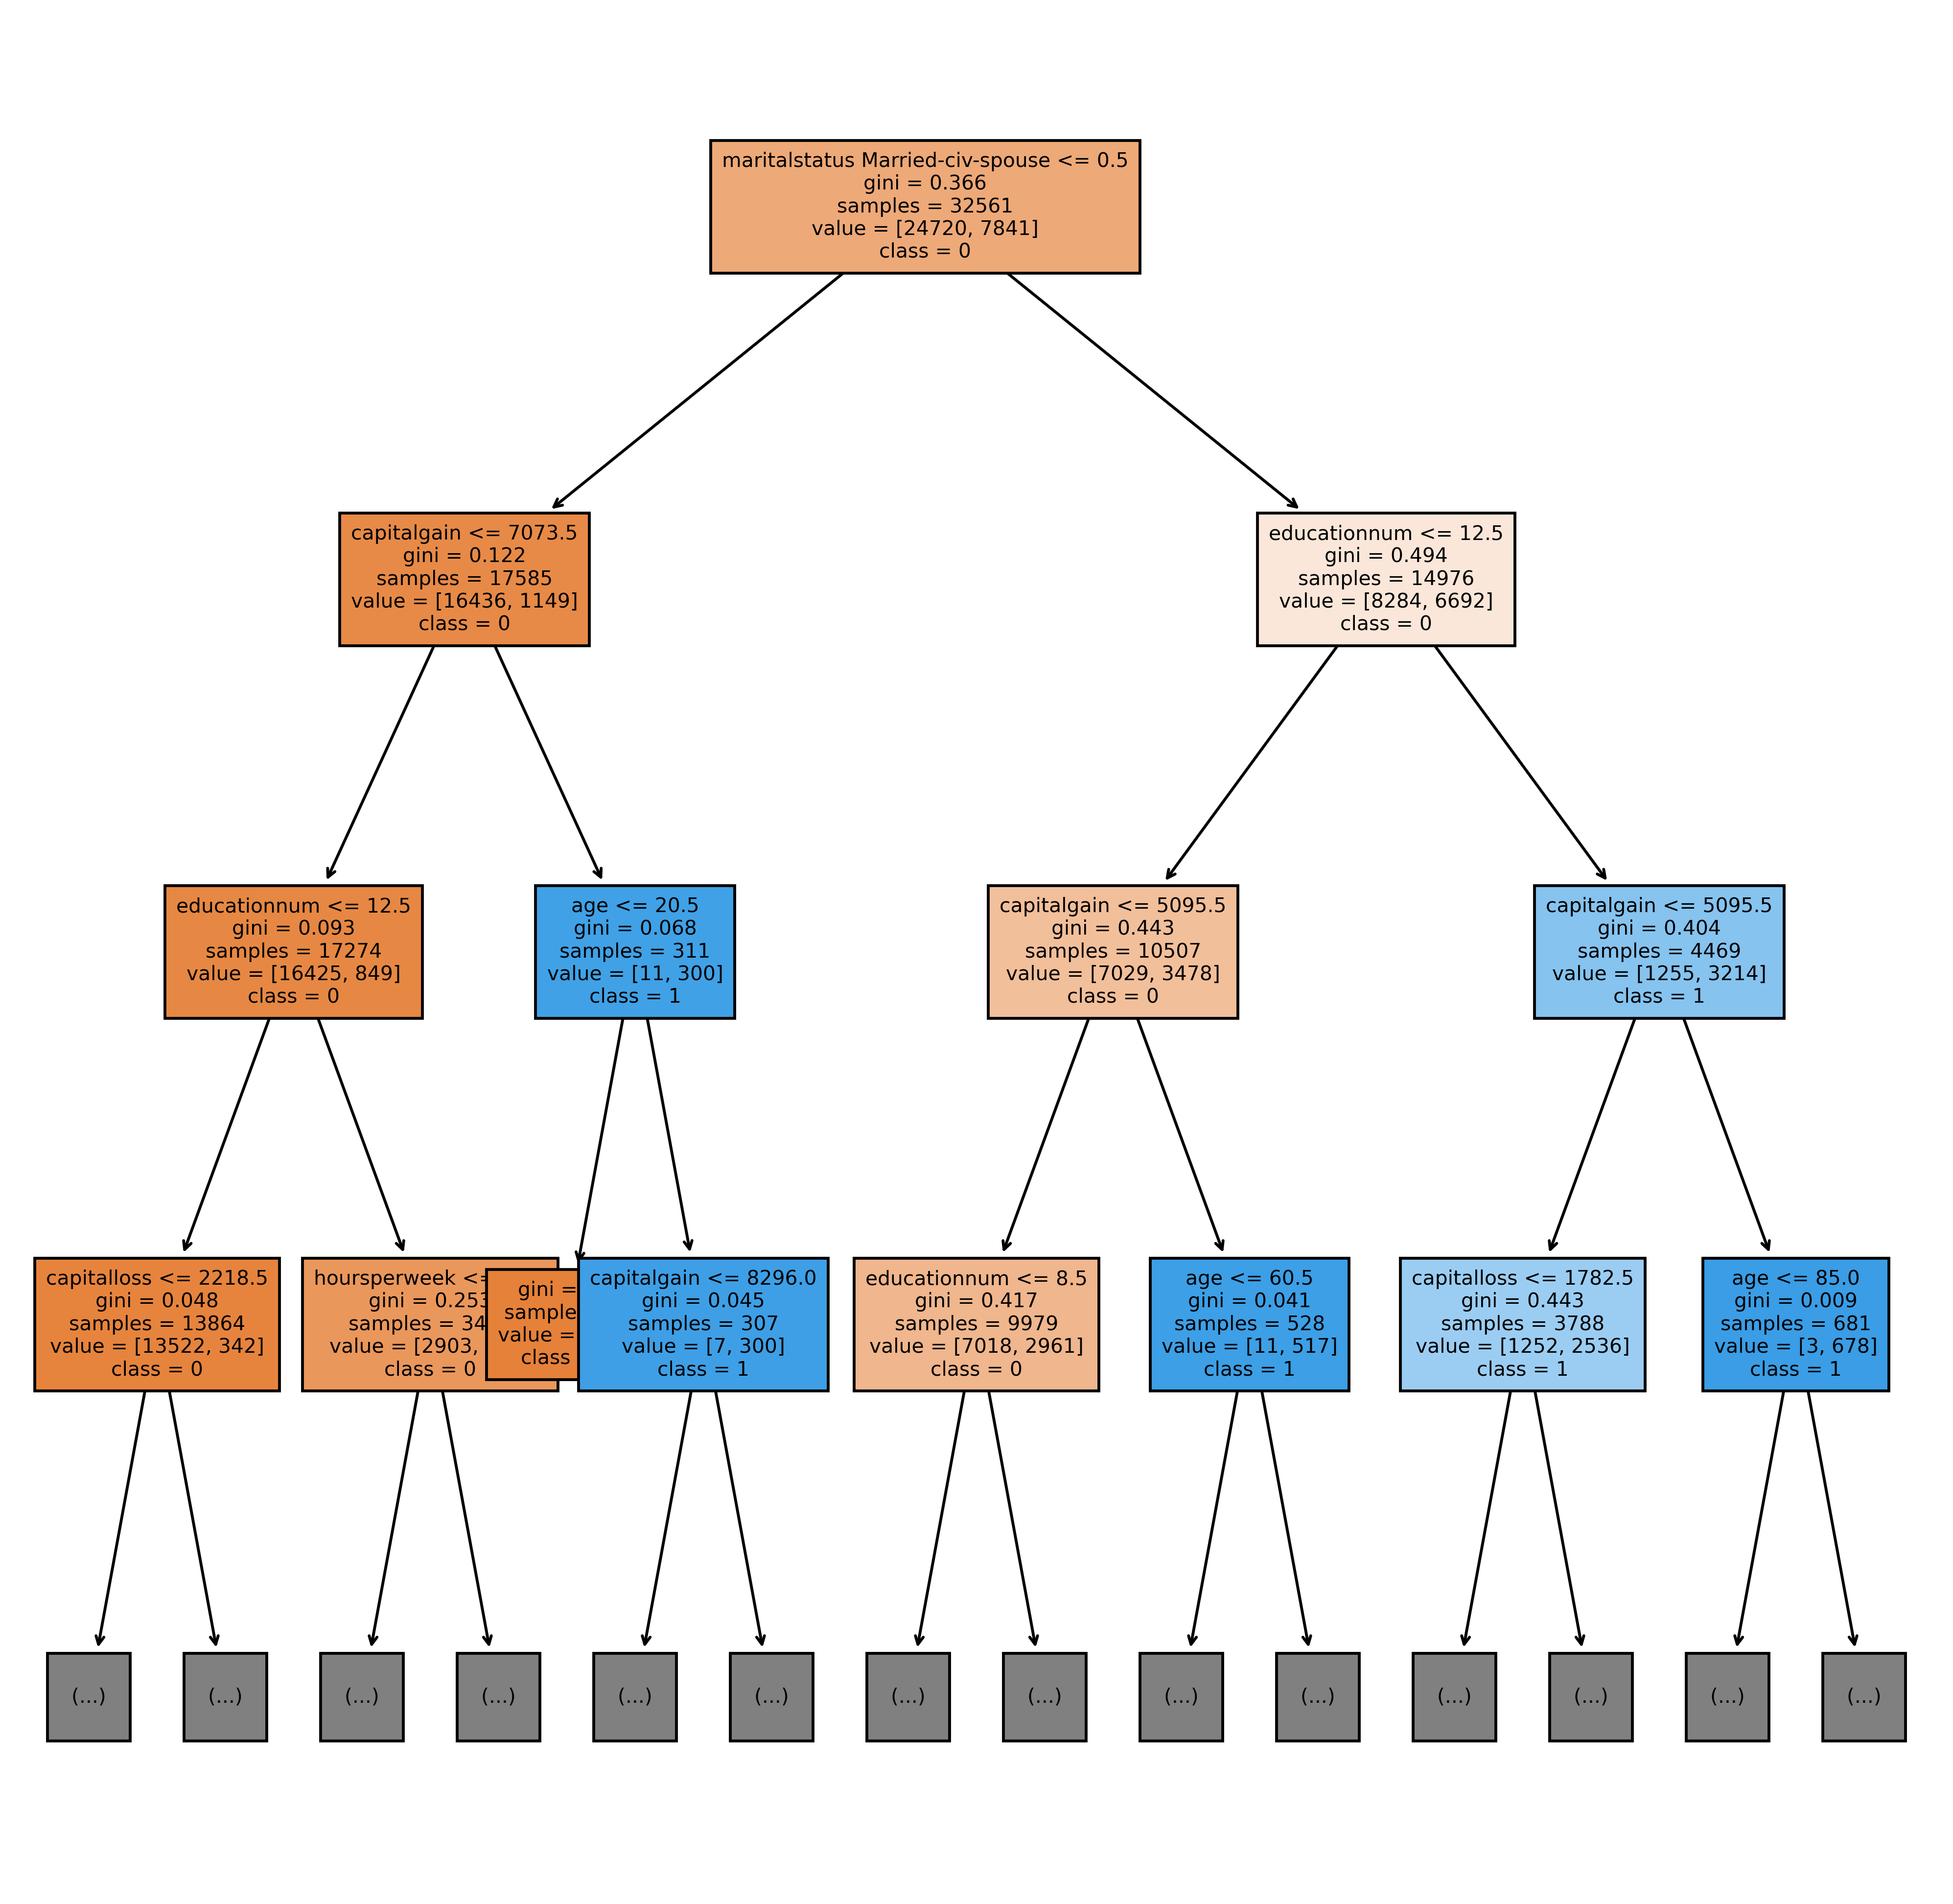

In [200]:
plt.figure(figsize=(12, 12), dpi=420)
tree.plot_tree(classifier,
               feature_names=x.columns,
               class_names=[str(np.unique(y)[0]), str(np.unique(y)[1])],
               filled = True,
               fontsize=7,
               max_depth=3)

### STANDART NEURAL NETWORK

#### Batchsize parametresini küçültmek modelin zamanını uzatırken, accuracy score için anlamlı bir değişime sebep olmadı. Bu yüzden bu parametre, sutün sayısı adedince ayarlandı. 

#### Epochs parametresi orta 100 olarak ayarlandı. Ancak callback parametresi ile kontrolü sağlandı. callback parametresi 7 iken sürekli olarak çok yavaş bir şekilde artan bir accuracy score mevcut ancak işlemleri 100 defa yapıyor. Harcanan zaman ele alındığında verimli değil. Bununla beraber callback parametresi 4 olarak ayarlandığında model 7. seferde işlemde eğitiliyor ve doğruluk payı nereyedeyse 100. kere bu işlemi yapması ile aynı. 

In [18]:
import tensorflow as tf
import keras as ks

from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LSTM, Embedding


In [38]:
binary_y = np.zeros((len(h),2))
for f in range(len(h)):
    if h[f] == 0:
        binary_y[f][0] = 1
    else:
        binary_y[f][1] = 1

In [42]:
x_train, x_test, binary_y_train, binary_y_test = train_test_split(x, binary_y, test_size=0.30)

n_cols = x_train.shape[1]

107

In [130]:
model = ks.models.Sequential()
model.add(Dense(128, input_shape=(n_cols,), activation = "relu")) ## Giriş katmanını tanımladık ve burada 32 adet nöron bulunuyor. Girecek 
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(55, activation= "relu"))  #(input+output)/2
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(2, activation='softmax'))

In [76]:
stop_parameter = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7) ## 7 kere improvement yaşanmazsa epochs kendini stop ediyor. 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['binary_accuracy'])

fitted_model = model.fit(x_train, binary_y_train, validation_data = (x_test, binary_y_test), batch_size=107, epochs=100, verbose = 1)

Epoch 1/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2912 - binary_accuracy: 0.8653 - val_loss: 0.3217 - val_binary_accuracy: 0.8481
Epoch 2/100
214/214 [==============================] - 1s 2ms/step - loss: 0.2906 - binary_accuracy: 0.8663 - val_loss: 0.3320 - val_binary_accuracy: 0.8410
Epoch 3/100
214/214 [==============================] - 1s 2ms/step - loss: 0.2884 - binary_accuracy: 0.8663 - val_loss: 0.3691 - val_binary_accuracy: 0.8301
Epoch 4/100
214/214 [==============================] - 1s 2ms/step - loss: 0.2929 - binary_accuracy: 0.8634 - val_loss: 0.3145 - val_binary_accuracy: 0.8525
Epoch 5/100
214/214 [==============================] - 1s 2ms/step - loss: 0.2879 - binary_accuracy: 0.8645 - val_loss: 0.3453 - val_binary_accuracy: 0.8392
Epoch 6/100
214/214 [==============================] - 1s 2ms/step - loss: 0.2879 - binary_accuracy: 0.8647 - val_loss: 0.3181 - val_binary_accuracy: 0.8480
Epoch 7/100
214/214 [==============================] - 1s 

Epoch 53/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2768 - binary_accuracy: 0.8721 - val_loss: 0.3321 - val_binary_accuracy: 0.8482
Epoch 54/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2744 - binary_accuracy: 0.8715 - val_loss: 0.3355 - val_binary_accuracy: 0.8466
Epoch 55/100
214/214 [==============================] - 1s 2ms/step - loss: 0.2759 - binary_accuracy: 0.8713 - val_loss: 0.3323 - val_binary_accuracy: 0.8518
Epoch 56/100
214/214 [==============================] - 1s 3ms/step - loss: 0.2775 - binary_accuracy: 0.8706 - val_loss: 0.3369 - val_binary_accuracy: 0.8457
Epoch 57/100
214/214 [==============================] - 1s 2ms/step - loss: 0.2748 - binary_accuracy: 0.8731 - val_loss: 0.3284 - val_binary_accuracy: 0.8500
Epoch 58/100
214/214 [==============================] - 1s 2ms/step - loss: 0.2756 - binary_accuracy: 0.8724 - val_loss: 0.3252 - val_binary_accuracy: 0.8512
Epoch 59/100
214/214 [==============================

In [78]:
fitted_model.history

{'loss': [0.29124197363853455,
  0.29061782360076904,
  0.28835490345954895,
  0.2929200828075409,
  0.2879265546798706,
  0.2879233956336975,
  0.2880193591117859,
  0.28914427757263184,
  0.28908807039260864,
  0.2866683900356293,
  0.2886470556259155,
  0.2881557047367096,
  0.28591108322143555,
  0.28899285197257996,
  0.28664714097976685,
  0.2887853980064392,
  0.28641074895858765,
  0.28624334931373596,
  0.28493309020996094,
  0.2839548587799072,
  0.2845982015132904,
  0.28433477878570557,
  0.28370052576065063,
  0.28427353501319885,
  0.2854574918746948,
  0.2828567922115326,
  0.28234174847602844,
  0.28255966305732727,
  0.2812742292881012,
  0.2824576497077942,
  0.28093740344047546,
  0.2807949483394623,
  0.27967187762260437,
  0.2811870574951172,
  0.28165701031684875,
  0.2800455689430237,
  0.2807694673538208,
  0.27870815992355347,
  0.27965205907821655,
  0.2793056070804596,
  0.2828081250190735,
  0.2794884443283081,
  0.27984383702278137,
  0.2805125415325165,
  

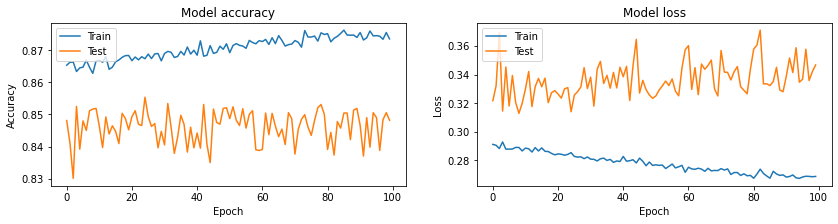

In [79]:
plt.figure(figsize=(14,3))

plt.subplot(1, 2, 1)
plt.plot(fitted_model.history['binary_accuracy'])
plt.plot(fitted_model.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [80]:
binary_y_pred = model.predict(x_test)
binary_yy_pred = np.argmax(binary_y_pred,axis=1)
binary_yy_test = np.argmax(binary_y_test, axis = 1)

306/306 [==============================] - 0s 766us/step


In [81]:
print(accuracy_score(binary_yy_test,binary_yy_pred))
confusion_matrix(binary_yy_test,binary_yy_pred)

0.8481932644078206


array([[6801,  605],
       [ 878, 1485]], dtype=int64)

### XGBOOST

# Q2

For this question we are going to use [the Dry Bean Dataset](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset):

Construct 

- Logistic regression
- SVM
- KNN
- Decision tree
- Gradient Boost (XGBoost)
- Neural network

models for the data. Cross-validate your models and measure the accuracies. Compare them putting the accuracies in a table.

In [82]:
with urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    bean = pd.read_excel(zf.open('DryBeanDataset/Dry_Bean_Dataset.xlsx'))
    
bean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [90]:
ns_bean = bean.copy()

### Öncelikle dataset bize ne diyor ona bir bakalım.

Relevant Information:
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Attribute Information:
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.

2.) Perimeter (P): Bean circumference is defined as the length of its border.

3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5.) Aspect ratio (K): Defines the relationship between L and l.

6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12.)Compactness (CO): Measures the roundness of an object: Ed/L

13.)ShapeFactor1 (SF1)

14.)ShapeFactor2 (SF2)

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [222]:
bean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

#### Null parametre yok, bu durumda öncelikle son sutünü düzenleyelim.

In [86]:
bean_unique = np.unique(bean["Class"])
for i in range(len(bean["Class"])):
    if bean["Class"][i] == bean_unique[0]:
        bean["Class"][i] = 1
    elif bean["Class"][i] == bean_unique[1]:
        bean["Class"][i] = 2
    elif bean["Class"][i] == bean_unique[2]:
        bean["Class"][i] = 3
    elif bean["Class"][i] == bean_unique[3]:
        bean["Class"][i] = 4
    elif bean["Class"][i] == bean_unique[4]:
        bean["Class"][i] = 5
    elif bean["Class"][i] == bean_unique[5]:
        bean["Class"][i] = 6
    elif bean["Class"][i] == bean_unique[6]:
        bean["Class"][i] = 7

<ipython-input-86-b248f966eb29>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bean["Class"][i] = 6
<ipython-input-86-b248f966eb29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bean["Class"][i] = 1
<ipython-input-86-b248f966eb29>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bean["Class"][i] = 2
<ipython-input-86-b248f966eb29>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [87]:
bean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,6
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,6
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,6
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,6
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,4
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,4
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,4
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,4


In [180]:
bean_x = bean.iloc[:,0:16]
bean_y = bean["Class"]
bean_y = bean_y.astype(int)

bean_x_train, bean_x_test, bean_y_train, bean_y_test = train_test_split(bean_x,bean_y,test_size=0.30)

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
sc = StandardScaler()
sc.fit(bean_x_train)
bean_x_train_std = sc.transform(bean_x_train)
bean_x_test_std = sc.transform(bean_x_test)

### LOGISTIC REGRESSION

In [242]:
beanLR = LogisticRegression(C=50.0, solver='lbfgs', multi_class='multinomial', max_iter=100000)
beanLR.fit(bean_x_train_std, bean_y_train)

LogisticRegression(C=50.0, max_iter=100000, multi_class='multinomial')

In [243]:
beanpredLR = beanLR.predict(bean_x_test_std)
print(accuracy_score(beanpredLR, bean_y_test))
print(confusion_matrix(beanpredLR, bean_y_test))
chisquare(confusion_matrix(beanpredLR, bean_y_test),axis=None)

0.922869735553379
[[382   0  14   0   3   2   1]
 [  0 161   0   0   0   0   0]
 [ 25   0 456   0  10   1   0]
 [  0   0   0 986   5   6  72]
 [  1   0  11   2 535   1  11]
 [  3   0   1  16   0 560  10]
 [ 12   0   7  74  13  14 689]]


Power_divergenceResult(statistic=25183.44564152791, pvalue=0.0)

### Görüldüğü üzere %92lik bir skor ile tahmin etti lojistik regresyon algoritması. Hatta Bombay cinsi fasülyeyi tamamen doğru tahmin etmiş gibi gözüküyor.

## SVM

In [255]:
beanSVC = SVC(C=5,
             kernel='rbf',
             max_iter=50000)
beanSVC.fit(bean_x_train_std, bean_y_train)

SVC(C=5, max_iter=50000)

In [256]:
beanpredSVC = beanSVC.predict(bean_x_test_std)
print(accuracy_score(beanpredSVC, bean_y_test))
print(confusion_matrix(beanpredSVC, bean_y_test))
chisquare(confusion_matrix(beanpredSVC, bean_y_test),axis=None)

0.9287463271302644
[[ 383    0   11    0    2    0    5]
 [   0  161    0    0    0    0    0]
 [  24    0  462    0    8    0    0]
 [   0    0    0 1008    5   10   75]
 [   1    0   12    2  534    1    9]
 [   5    0    1   13    0  556    5]
 [  10    0    3   55   17   17  689]]


Power_divergenceResult(statistic=25693.146425073453, pvalue=0.0)

### Lojistik regresyon ile çok benzer bir sonuç geldi.

## KNN

#### Toplamda 7 cins fasülye olduğu için, n=7 değeri için algoritmayı deneyeceğim. 

#### KNN algoritması için yine %90'ın üzerinde bir tahminde bulunuldu. 

In [275]:
beanKNN = KNeighborsClassifier(n_neighbors=7)
beanKNN.fit(bean_x_train_std, bean_y_train)

beanpredKNN = beanKNN.predict(bean_x_test_std)

In [276]:
print(beanKNN.score(bean_x_test_std, bean_y_test))

print(confusion_matrix(beanpredKNN,bean_y_test))
chisquare(confusion_matrix(beanpredKNN,bean_y_test), axis=None)

0.9172380019588638
[[371   0   9   0   2   2   4]
 [  0 161   0   0   0   0   0]
 [ 38   0 463   0  10   0   1]
 [  0   0   0 990   5  13  83]
 [  0   0  10   2 535   1  14]
 [  5   0   0  16   0 551   6]
 [  9   0   7  70  14  17 675]]


Power_divergenceResult(statistic=24931.4387855044, pvalue=0.0)

### DESICION TREE

#### max_depth parametresini sınırlamak yerine, daha önceki algoritmaların en yüksek skorlu olanındaki karmaşıklık matrislerinin en düşük değerleri baz alınarak, min_samples_split parametresi 5 olarak ayarlandı. Bu sayede algoritmanın en azından diğer modeller kadar doğru bir tahmin yapabilmesi öngörüldü. Bunun sonucunda %96'dan daha fazla bir doğruluk ile algoritmanın eğitilmesi sağlandı. Bu sayede max_depth=18 parametresinin, bu veriseti için yeterli olduğu görüldü. 

In [103]:
ns_bean.shape

(13611, 17)

In [122]:
ns_x = ns_bean.iloc[:,0:16]
ns_y = ns_bean.iloc[:,16]
ns_y = ns_y.astype(int)

ns_x_train, ns_x_test, ns_y_train, ns_y_test = train_test_split(ns_x, ns_y, test_size=0.3)

In [184]:
ns_y

0        6
1        6
2        6
3        6
4        6
        ..
13606    4
13607    4
13608    4
13609    4
13610    4
Name: Class, Length: 13611, dtype: int32

In [117]:
bean_classifier = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)
bean_classifier.fit(ns_x_train, ns_y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [123]:
bean_classifier.score(ns_x_test,ns_y_test)

0.9610675808031341

In [124]:
print(bean_classifier.tree_.max_depth)

18


[Text(0.5267857142857143, 0.9, 'MajorAxisLength <= 327.969\nentropy = 2.639\nsamples = 9527\nvalue = [922, 344, 1134, 2512, 1349, 1424, 1842]\nclass = 2'),
 Text(0.2857142857142857, 0.7, 'MinorAxisLength <= 183.493\nentropy = 1.752\nsamples = 5840\nvalue = [94, 0, 6, 2512, 110, 1421, 1697]\nclass = 2'),
 Text(0.14285714285714285, 0.5, 'Perimeter <= 704.902\nentropy = 0.855\nsamples = 2820\nvalue = [1, 0, 0, 2323, 100, 28, 368]\nclass = 2'),
 Text(0.07142857142857142, 0.3, 'ShapeFactor1 <= 0.007\nentropy = 0.221\nsamples = 1961\nvalue = [0, 0, 0, 1906, 4, 26, 25]\nclass = 2'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'Compactness <= 0.743\nentropy = 1.42\nsamples = 859\nvalue = [1, 0, 0, 417, 96, 2, 343]\nclass = 2'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'Compactness <= 0.853\nentropy = 1.486\nsamples = 3020\nvalue = [

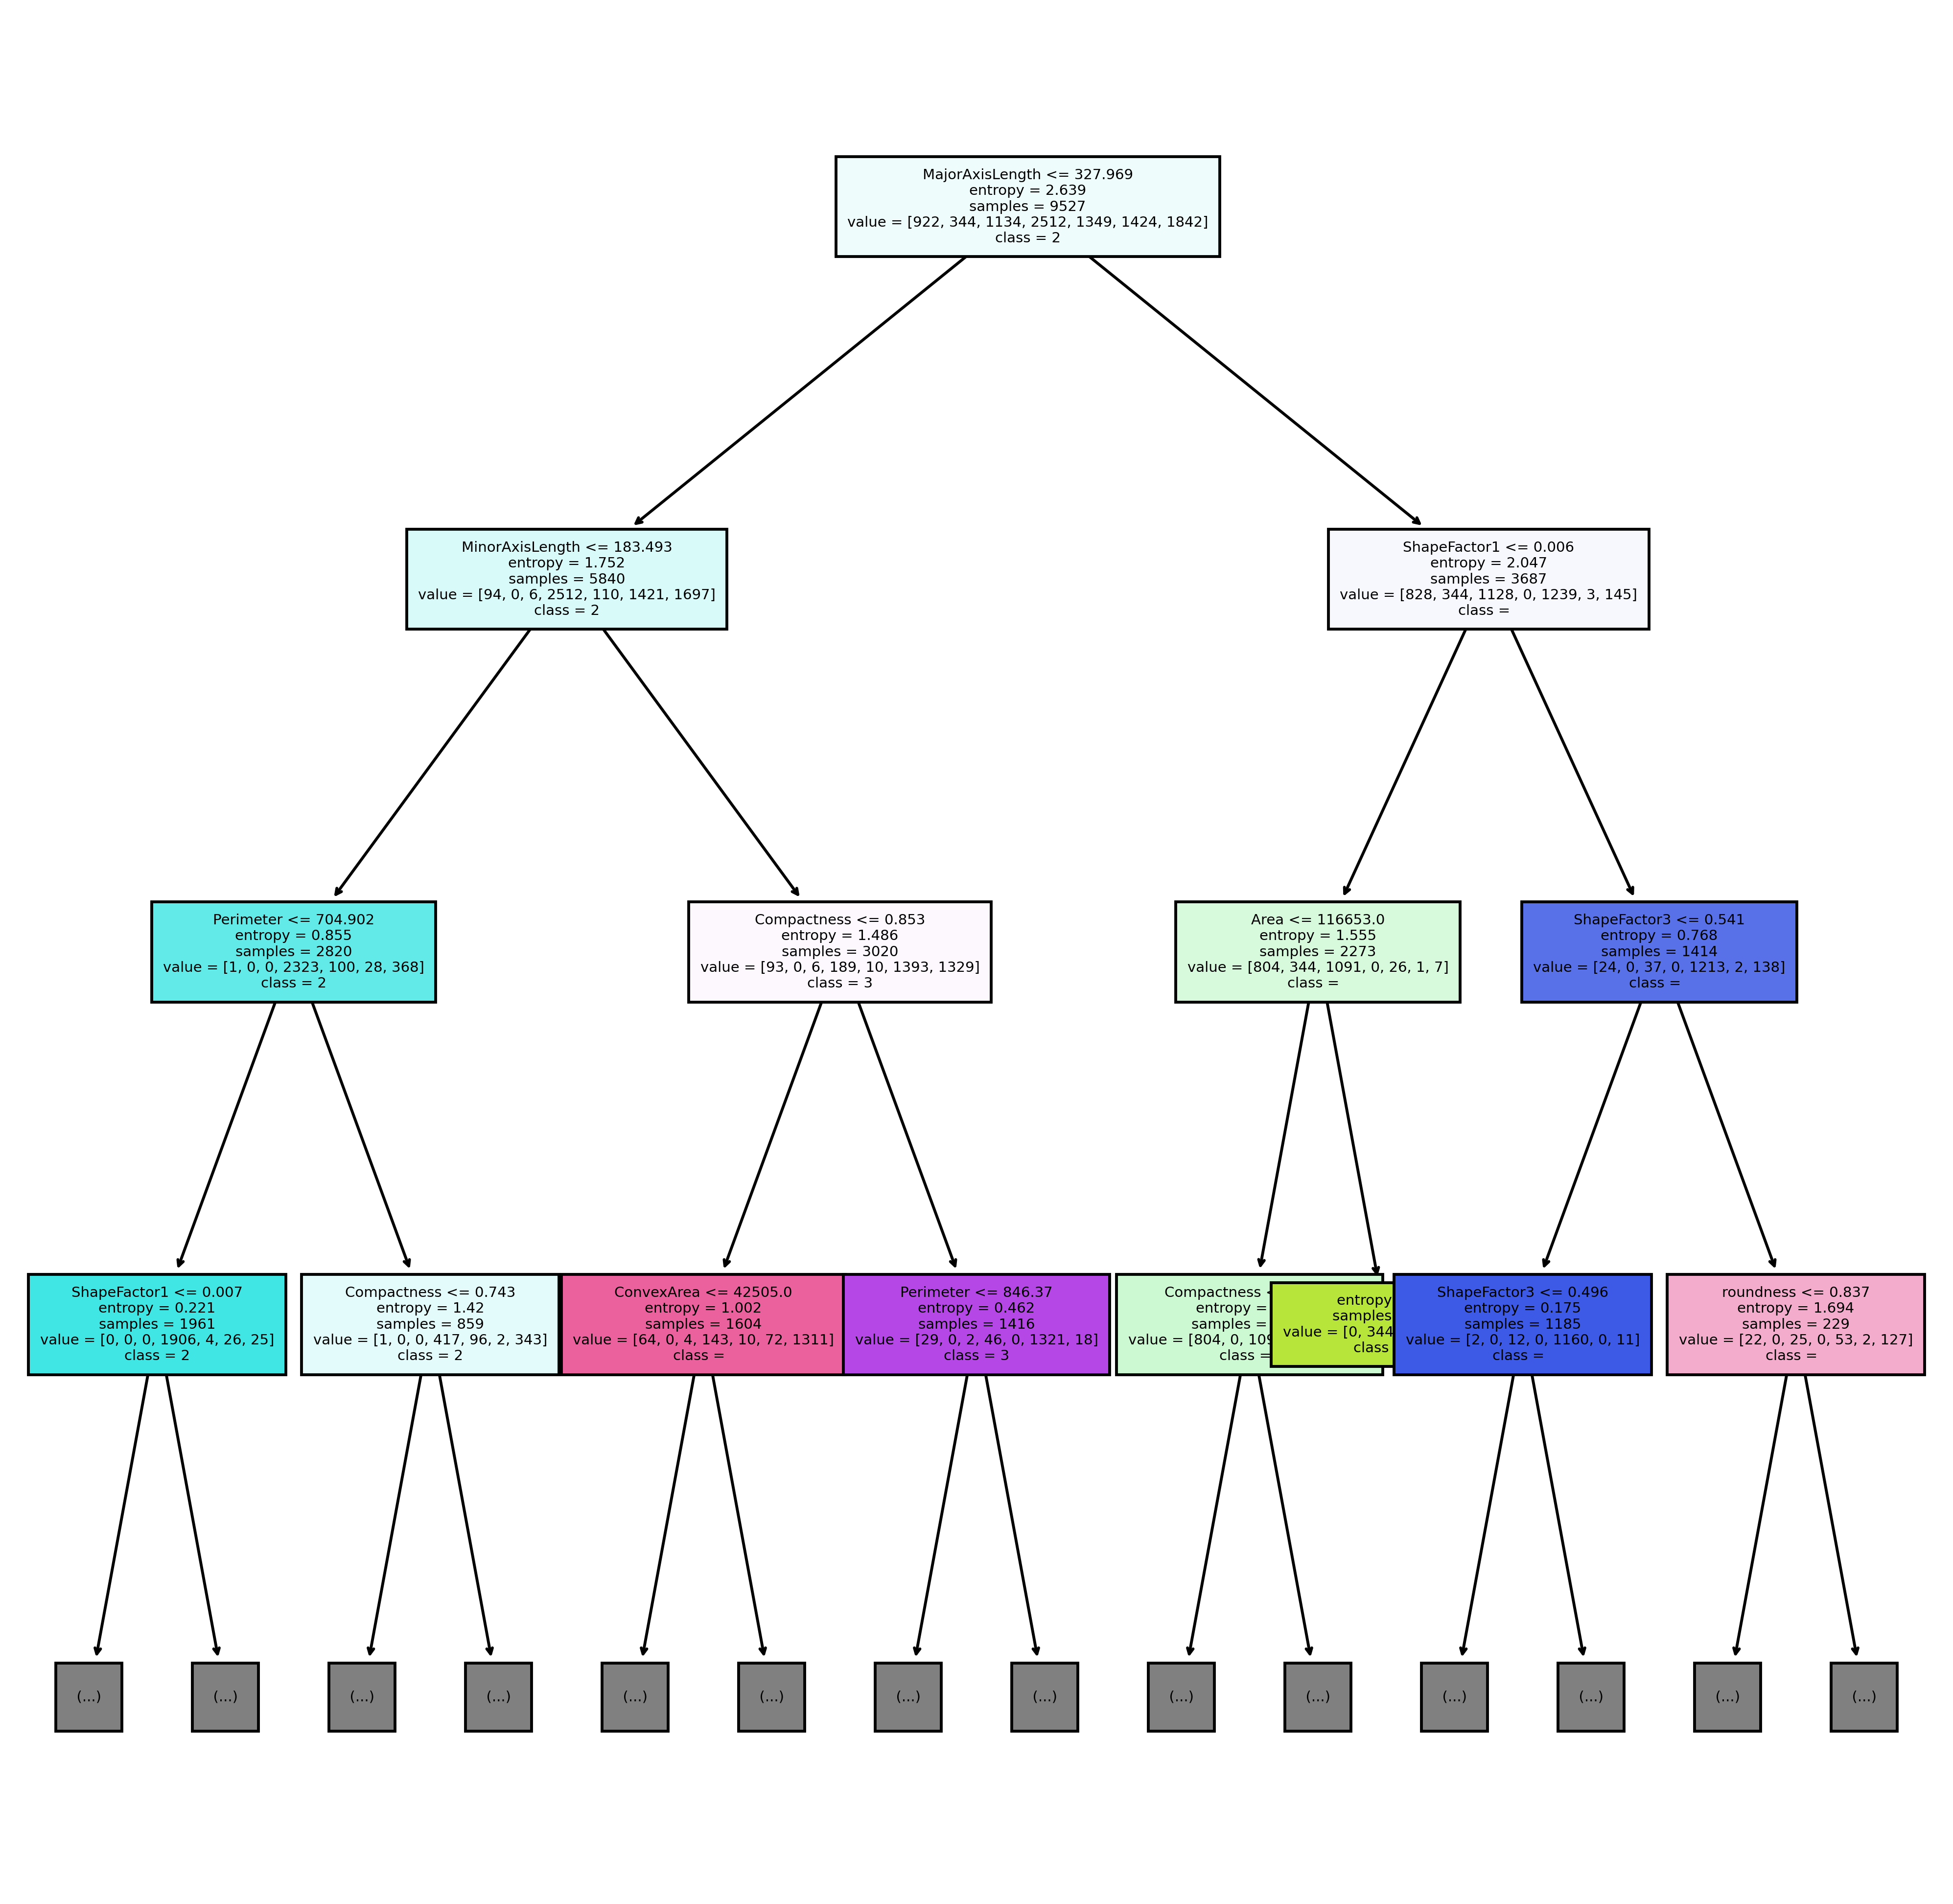

In [125]:
plt.figure(figsize=(12, 12), dpi=420)
tree.plot_tree(bean_classifier,
               feature_names=ns_x.columns,
               class_names=str(np.unique(ns_y)),
               filled = True,
               max_depth=3,
               fontsize=5)

### STANDART NEURAL NETWORK

#### Modelin parametreleri ile oynamak modelin binary_acc skorunu yükseltmiyor. Daima %85 civarında duruyor. Bununla beraber model oldukça kötü tahminde bulundu ve oldukça kötü bir karmaşıklık matrisi elde ettik. Diğer metodlar çok daha iyi sonuçlar vermişti. 

In [191]:
labeler = LabelBinarizer()
splitted_bean_y = labeler.fit_transform(bean_y)
splitted_bean_y

bean_x_train, bean_x_test, bean_y_train_sp, bean_y_test_sp = train_test_split(bean_x, splitted_bean_y,test_size=0.30)

In [226]:
bean_model = ks.models.Sequential()
bean_model.add(Dense(128, input_shape = (None,16), activation = "relu")) 
##bean_model.add(tf.keras.layers.BatchNormalization())
bean_model.add(Dense(32, activation= "relu"))
##bean_model.add(tf.keras.layers.BatchNormalization())
bean_model.add(Dense(7, activation='softmax'))

In [227]:
stop_parameter2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) ## 3 kere improvement yaşanmazsa epochs kendini stop ediyor. 

bean_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['binary_accuracy'])

fitted_bean_model = bean_model.fit(bean_x_train, bean_y_train_sp, validation_data = (bean_x_test, bean_y_test_sp), batch_size=16, epochs=100, verbose = 1, callbacks = stop_parameter2)

Epoch 1/100
596/596 [==============================] - 1s 1ms/step - loss: 303.6937 - binary_accuracy: 0.7594 - val_loss: 286.6523 - val_binary_accuracy: 0.7974
Epoch 2/100
596/596 [==============================] - 1s 1ms/step - loss: 153.1445 - binary_accuracy: 0.7676 - val_loss: 202.6812 - val_binary_accuracy: 0.7576
Epoch 3/100
596/596 [==============================] - 1s 1ms/step - loss: 110.9332 - binary_accuracy: 0.7738 - val_loss: 224.5892 - val_binary_accuracy: 0.7485
Epoch 4/100
596/596 [==============================] - 1s 1ms/step - loss: 83.7110 - binary_accuracy: 0.7786 - val_loss: 62.8344 - val_binary_accuracy: 0.7994
Epoch 5/100
596/596 [==============================] - 1s 1ms/step - loss: 60.4476 - binary_accuracy: 0.7820 - val_loss: 35.7596 - val_binary_accuracy: 0.7630
Epoch 6/100
596/596 [==============================] - 1s 1ms/step - loss: 69.4769 - binary_accuracy: 0.7872 - val_loss: 1.8605 - val_binary_accuracy: 0.8571
Epoch 7/100
596/596 [====================

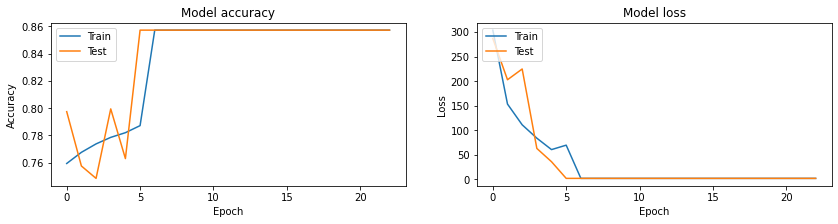

In [228]:
plt.figure(figsize=(14,3))

plt.subplot(1, 2, 1)
plt.plot(fitted_bean_model.history['binary_accuracy'])
plt.plot(fitted_bean_model.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(fitted_bean_model.history['loss'])
plt.plot(fitted_bean_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [249]:
bean_y_pred = bean_model.predict(bean_x_test)
bean_yy_pred = np.argmax(bean_y_pred,axis=1)
bean_yy_test = np.argmax(bean_y_test_sp, axis = 1)

128/128 [==============================] - 0s 851us/step


In [259]:
print(bean_x_test.shape)
print(bean_y_pred.shape)
print(bean_yy_pred.shape)
print(bean_yy_test.shape)

(4084, 16)
(4084, 7)
(4084,)
(4084,)


In [261]:
print(accuracy_score(bean_yy_test,bean_yy_pred))
confusion_matrix(bean_yy_test, bean_yy_pred)


0.2541625857002938


array([[   0,    0,    0,  402,    0,    0,    0],
       [   0,    0,    0,  165,    0,    0,    0],
       [   0,    0,    0,  489,    0,    0,    0],
       [   0,    0,    0, 1038,    0,    0,    0],
       [   0,    0,    0,  588,    0,    0,    0],
       [   0,    0,    0,  617,    0,    0,    0],
       [   0,    0,    0,  785,    0,    0,    0]], dtype=int64)

### XGBOOST

# Q3

For this question we are going to use the [Japanese MNIST](https://github.com/rois-codh/kmnist) dataset.

Construct a convolutional neural network model for the dataset and cross-validate your model.

In [29]:
import requests

try:
    from tqdm import tqdm
except ImportError:
    tqdm = lambda x, total, unit: x  # If tqdm doesn't exist, replace it with a function that does nothing
    print('**** Could not import tqdm. Please install tqdm for download progressbars! (pip install tqdm) ****')

# Python2 compatibility
try:
    input = raw_input
except NameError:
    pass

download_dict = {
    '1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)': {
        '1) MNIST data format (ubyte.gz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz'],
        '2) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'],
    },
    '2) Kuzushiji-49 (49 classes, 28x28, 270k examples)': {
        '1) NumPy data format (.npz)':
            ['http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz',
            'http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz'],
    },
    '3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)': {
        '1) Folders of images (.tar)':
            ['http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar'],
    }

}

# Download a list of files
def download_list(url_list):
    for url in url_list:
        path = url.split('/')[-1]
        r = requests.get(url, stream=True)
        with open(path, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))

            for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
                if chunk:
                    f.write(chunk)
    print('All dataset files downloaded!')

# Ask the user about which path to take down the dict
def traverse_dict(d):
    print('Please select a download option:')
    keys = sorted(d.keys())  # Print download options
    for key in keys:
        print(key)

    userinput = input('> ').strip()

    try:
        selection = int(userinput) - 1
    except ValueError:
        print('Your selection was not valid')
        traverse_dict(d)  # Try again if input was not valid
        return

    selected = keys[selection]

    next_level = d[selected]
    if isinstance(next_level, list):  # If we've hit a list of downloads, download that list
        download_list(next_level)
    else:
        traverse_dict(next_level)     # Otherwise, repeat with the next level

traverse_dict(download_dict)

Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> 1
Please select a download option:
1) MNIST data format (ubyte.gz)
2) NumPy data format (.npz)
> 2


  0%|                                                                                        | 0/17954 [00:00<?, ?KB/s]

  0%|                                                                                           | 0/30 [00:00<?, ?KB/s]

  0%|                                                                                         | 0/3008 [00:00<?, ?KB/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?KB/s]

All dataset files downloaded!


In [30]:
from numpy import load

In [49]:
minst_ = load('kmnist-train-labels.npz')
lst = minst.files
for item in lst:
    print(item)
    print(minst[item])

arr_0
[2 9 3 ... 9 4 2]


In [50]:
minst[item].size

10000

# Q4

For this question we are going to use Box and Jenkins Airline Passenger Dataset. For this dataset, please install the `rdatasets` library:

In [38]:
#!pip install rdatasets
from rdatasets import data

<AxesSubplot:>

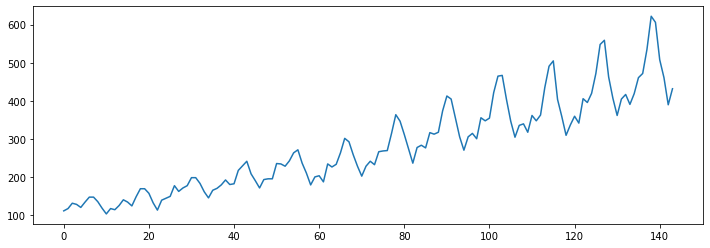

In [44]:
airline = data('AirPassengers')

plt.figure(figsize=(12,4))
airline['value'].plot()

In [46]:
train = airline['value'][:123]
test = airline['value'][123:]

Construct

- recurrent 
- LSTM

netural network models on the train set (the first 122 values), and then test it on the last 24 values.